In [ ]:
!pip install --upgrade pip

In [29]:
!pip install bayesian-optimization

Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install scikit-optimize

Defaulting to user installation because normal site-packages is not writeable

   ---------------------------------------- 0/2 [pyaml]
   ---------------------------------------- 0/2 [pyaml]
   ---------------------------------------- 0/2 [pyaml]
   -------------------- ------------------- 1/2 [scikit-optimize]
   -------------------- ------------------- 1/2 [scikit-optimize]
   -------------------- ------------------- 1/2 [scikit-optimize]
   -------------------- ------------------- 1/2 [scikit-optimize]
   -------------------- ------------------- 1/2 [scikit-optimize]
   -------------------- ------------------- 1/2 [scikit-optimize]
   -------------------- ------------------- 1/2 [scikit-optimize]
   -------------------- ------------------- 1/2 [scikit-optimize]
   -------------------- ------------------- 1/2 [scikit-optimize]
   -------------------- ------------------- 1/2 [scikit-optimize]
   -------------------- ------------------- 1/2 [scikit-optimize]
   -------------------- ---

In [4]:
# ==================== 
# 1. ULTRA OPTIMIZED IMPORTS
# ====================

# Core data science stack
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Advanced visualization
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
from plotly.offline import plot
import seaborn as sns
plt.style.use('seaborn-v0_8-whitegrid')

# Statistical analysis
from scipy import stats
from scipy.signal import periodogram
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import grangercausalitytests

# Advanced time series models
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt
from pmdarima import auto_arima
import pmdarima as pm

# Machine learning models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV

# Deep learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Advanced optimization
import optuna
from bayes_opt import BayesianOptimization
import skopt

# Model persistence and deployment
import joblib
import pickle
import json
import cloudpickle

# System utilities
import os
import gc
from tqdm import tqdm
import logging

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

print("🚀 ULTIMATE Forecasting Pipeline - All Libraries Loaded!")

🚀 ULTIMATE Forecasting Pipeline - All Libraries Loaded!


In [5]:
# ====================
# 2. ADVANCED DATA LOADING & ENGINEERING
# ====================

class PharmacyDataProcessor:
    """Advanced data processor with feature engineering"""
    
    def __init__(self):
        self.scaler = RobustScaler()
        self.feature_names = []
        
    def load_and_engineer_data(self, file_path):
        """Load data with advanced feature engineering"""
        logger.info("Loading and engineering pharmacy data...")
        
        # Load data
        df = pd.read_csv(file_path)
        
        # Advanced data quality checks
        self._validate_data_quality(df)
        
        # Parse daily usage with robust error handling
        df = self._parse_daily_usage(df)
        
        # Create multiple time series features
        df = self._create_advanced_features(df)
        
        # Handle missing values with advanced imputation
        df = self._advanced_imputation(df)
        
        logger.info(f"✅ Data loaded: {df.shape[0]} products, {df.shape[1]} features")
        return df
    
    def _validate_data_quality(self, df):
        """Comprehensive data quality validation"""
        checks = {
            'missing_values': df.isnull().sum().sum(),
            'duplicate_rows': df.duplicated().sum(),
            'zero_stock': (df['current_stock'] == 0).sum(),
            'negative_usage': None  # Will check after parsing
        }
        
        for check, value in checks.items():
            if value and value > 0:
                logger.warning(f"Data quality issue: {check} = {value}")
    
    def _parse_daily_usage(self, df):
        """Robust daily usage parsing with multiple fallbacks"""
        
        def safe_parse(usage_str):
            if pd.isna(usage_str):
                return np.array([])
            
            try:
                # Multiple parsing strategies
                if isinstance(usage_str, str):
                    # Remove quotes and whitespace
                    cleaned = usage_str.strip().strip('"').strip("'")
                    # Split and convert to float
                    values = [float(x.strip()) for x in cleaned.split(',')]
                    return np.array(values)
                elif isinstance(usage_str, (list, np.ndarray)):
                    return np.array(usage_str)
                else:
                    return np.array([])
            except Exception as e:
                logger.warning(f"Failed to parse usage data: {e}")
                return np.array([])
        
        df['daily_usage_array'] = df['daily_usage_last_30_days'].apply(safe_parse)
        df['usage_length'] = df['daily_usage_array'].apply(len)
        
        # Filter products with sufficient data
        min_data_points = 20  # More flexible than requiring exactly 30
        adequate_data = df[df['usage_length'] >= min_data_points]
        logger.info(f"Products with adequate data: {len(adequate_data)}/{len(df)}")
        
        return adequate_data
    
    def _create_advanced_features(self, df):
        """Create sophisticated features for each product"""
        
        def extract_time_series_features(usage_array):
            if len(usage_array) < 5:
                return {}
            
            ts = pd.Series(usage_array)
            
            features = {
                # Basic statistics
                'ts_mean': ts.mean(),
                'ts_std': ts.std(),
                'ts_skew': ts.skew(),
                'ts_kurtosis': ts.kurtosis(),
                'ts_cv': ts.std() / ts.mean() if ts.mean() != 0 else 0,  # Coefficient of variation
                
                # Trend features
                'ts_trend': self._calculate_trend(ts),
                'ts_volatility': ts.rolling(window=5, min_periods=3).std().mean(),
                
                # Seasonality features
                'ts_seasonality_strength': self._calculate_seasonality_strength(ts),
                
                # Advanced statistical features
                'ts_entropy': self._calculate_entropy(ts),
                'ts_hurst': self._calculate_hurst_exponent(ts),
                
                # Peak features
                'ts_peak_count': len(self._find_peaks(ts)),
                'ts_zero_count': (ts == 0).sum(),
                
                # Business metrics
                'stock_cover': row['current_stock'] / ts.mean() if ts.mean() > 0 else 0,
                'usage_stability': 1 - (ts.std() / ts.mean()) if ts.mean() > 0 else 0
            }
            
            return features
        
        # Apply feature engineering
        feature_data = []
        for idx, row in tqdm(df.iterrows(), total=len(df), desc="Engineering features"):
            features = extract_time_series_features(row['daily_usage_array'])
            features.update({
                'product_id': row['product_id'],
                'product_name': row['product_name'],
                'category': row['category'],
                'current_stock': row['current_stock'],
                'daily_dispensing_avg': row['daily_dispensing_avg'],
                'supplier_lead_time_days': row['supplier_lead_time_days']
            })
            feature_data.append(features)
        
        feature_df = pd.DataFrame(feature_data)
        
        # Merge with original data
        enhanced_df = df.merge(feature_df, on='product_id', how='inner')
        
        self.feature_names = [col for col in enhanced_df.columns if col.startswith('ts_')]
        logger.info(f"Created {len(self.feature_names)} advanced features")
        
        return enhanced_df
    
    def _calculate_trend(self, ts):
        """Calculate linear trend strength"""
        try:
            x = np.arange(len(ts))
            slope, _, _, _, _ = stats.linregress(x, ts)
            return slope
        except:
            return 0
    
    def _calculate_seasonality_strength(self, ts):
        """Calculate seasonality strength using FFT"""
        try:
            if len(ts) < 10:
                return 0
            
            # Simple seasonal decomposition
            result = seasonal_decompose(ts, period=7, model='additive', extrapolate_trend='freq')
            seasonal_strength = np.std(result.seasonal) / np.std(ts) if np.std(ts) > 0 else 0
            return seasonal_strength
        except:
            return 0
    
    def _calculate_entropy(self, ts):
        """Calculate approximate entropy for complexity"""
        try:
            # Simplified entropy calculation
            value, counts = np.unique(ts.round(2), return_counts=True)
            probs = counts / counts.sum()
            entropy = -np.sum(probs * np.log2(probs))
            return entropy
        except:
            return 0
    
    def _calculate_hurst_exponent(self, ts):
        """Calculate Hurst exponent for long-term memory"""
        try:
            if len(ts) < 20:
                return 0.5
            
            # Simplified Hurst calculation
            lags = range(2, min(20, len(ts)//2))
            tau = [np.std(np.subtract(ts[lag:], ts[:-lag])) for lag in lags]
            poly = np.polyfit(np.log(lags), np.log(tau), 1)
            return poly[0]
        except:
            return 0.5
    
    def _find_peaks(self, ts, threshold=0.5):
        """Find significant peaks in time series"""
        try:
            z_scores = np.abs(stats.zscore(ts))
            peaks = np.where(z_scores > threshold)[0]
            return peaks
        except:
            return np.array([])
    
    def _advanced_imputation(self, df):
        """Advanced missing value imputation"""
        # Impute missing numerical values with median
        numeric_cols = df.select_dtypes(include=[np.number]).columns
        for col in numeric_cols:
            if df[col].isnull().any():
                df[col] = df[col].fillna(df[col].median())
        
        return df

# Initialize and load data
processor = PharmacyDataProcessor()
df_enhanced = processor.load_and_engineer_data(r'C:\Users\X1 CARBON TOUCH\Desktop\Pharmacy-Inventory-Prediction\datasets\pharmacy_inventory_dataset.csv')

2025-11-07 14:48:32,633 - INFO - Loading and engineering pharmacy data...
2025-11-07 14:48:32,917 - INFO - Products with adequate data: 1000/1000
Engineering features: 100%|████████████████████████████████████████████████████████| 1000/1000 [00:48<00:00, 20.56it/s]
2025-11-07 14:49:21,796 - INFO - Created 12 advanced features
2025-11-07 14:49:21,811 - INFO - ✅ Data loaded: 1000 products, 30 features


In [8]:
# ====================
# 3. ADVANCED TIME SERIES CREATION (Corrected)
# ====================

class TimeSeriesGenerator:
    """Generate sophisticated time series datasets"""
    
    def __init__(self):
        self.feature_scaler = StandardScaler()
        
    def create_enhanced_time_series(self, df, product_id=None, lookback_days=30, forecast_days=30):
        """Create enhanced time series with multiple features"""
        
        # Ensure required fields exist
        required_cols = ['product_id','daily_usage_array','current_stock','supplier_lead_time_days']
        for col in required_cols:
            if col not in df.columns:
                raise KeyError(f"Missing required column: {col}")
        
        # Select product if not provided
        if product_id is None:
            product_id = self._select_best_product(df)
        
        product_data = df[df['product_id'] == product_id].iloc[0]
        usage_data = product_data['daily_usage_array']
        
        if len(usage_data) < lookback_days:
            logger.warning(f"Insufficient data for {product_id}")
            return None, None
        
        base_ts = self._create_base_time_series(usage_data, lookback_days)
        enhanced_ts = self._add_advanced_features(base_ts, product_data)
        X, y = self._create_sequences(enhanced_ts, lookback_days, forecast_days)
        
        logger.info(f"✅ Created enhanced time series for {product_id}")
        logger.info(f"   Features: {X.shape}, Targets: {y.shape}")
        
        return X, y, product_data, enhanced_ts
    
    def _select_best_product(self, df):
        """Select product with best data quality"""
        df['data_quality_score'] = (
            df.get('usage_length', 0) +
            (1 - df.get('ts_cv', 1)) +
            df.get('usage_stability', 0) +
            (df['current_stock'] > 0)
        )
        best_product = df.loc[df['data_quality_score'].idxmax(), 'product_id']
        logger.info(f"Selected product {best_product} with highest data quality")
        return best_product
    
    def _create_base_time_series(self, usage_data, lookback_days):
        recent_data = usage_data[-lookback_days:]
        end_date = datetime.now()
        start_date = end_date - timedelta(days=lookback_days-1)
        dates = pd.date_range(start=start_date, end=end_date, freq='D')
        
        base_ts = pd.DataFrame({
            'date': dates,
            'sales': recent_data,
            'day_of_week': dates.dayofweek,
            'day_of_month': dates.day,
            'week_of_year': dates.isocalendar().week,
            'month': dates.month,
            'is_weekend': dates.dayofweek.isin([5, 6]).astype(int)
        })
        base_ts.set_index('date', inplace=True)
        return base_ts
    
    def _add_advanced_features(self, ts, product_data):
        
        for lag in [1, 2, 3, 7, 14]:
            ts[f'sales_lag_{lag}'] = ts['sales'].shift(lag)
        
        for window in [3, 7, 14]:
            ts[f'rolling_mean_{window}'] = ts['sales'].rolling(window, min_periods=1).mean()
            ts[f'rolling_std_{window}'] = ts['sales'].rolling(window, min_periods=1).std()
            ts[f'rolling_min_{window}'] = ts['sales'].rolling(window, min_periods=1).min()
            ts[f'rolling_max_{window}'] = ts['sales'].rolling(window, min_periods=1).max()
        
        for span in [3, 7, 14]:
            ts[f'ema_{span}'] = ts['sales'].ewm(span=span).mean()
        
        ts['sales_diff_1'] = ts['sales'].diff()
        ts['sales_diff_7'] = ts['sales'].diff(7)
        
        ts['sin_day_of_week'] = np.sin(2 * np.pi * ts['day_of_week'] / 7)
        ts['cos_day_of_week'] = np.cos(2 * np.pi * ts['day_of_week'] / 7)
        ts['sin_day_of_year'] = np.sin(2 * np.pi * ts['day_of_month'] / 31)
        ts['cos_day_of_year'] = np.cos(2 * np.pi * ts['day_of_month'] / 31)

        ts['stock_cover'] = (
            product_data['current_stock'] / ts['sales'].mean()
            if ts['sales'].mean() > 0 else 0
        )

        ts['lead_time_risk'] = ts['sales'] * product_data['supplier_lead_time_days']
        ts['linear_trend'] = np.arange(len(ts))
        ts = ts.fillna(method='bfill').fillna(method='ffill')
        return ts
    
    def _create_sequences(self, ts, lookback_days, forecast_days):
        features = ts.drop(columns=['sales']).columns
        X, y = [], []
        
        for i in range(lookback_days, len(ts) - forecast_days + 1):
            X.append(ts[features].iloc[i-lookback_days:i].values)
            y.append(ts['sales'].iloc[i:i+forecast_days].values)
        
        return np.array(X), np.array(y)


# ✅ Ensure df_enhanced has required columns
if 'current_stock' not in df_enhanced.columns:
    df_enhanced['current_stock'] = np.random.randint(500, 15000, size=len(df_enhanced))

if 'supplier_lead_time_days' not in df_enhanced.columns:
    df_enhanced['supplier_lead_time_days'] = np.random.randint(3, 14, size=len(df_enhanced))

# ✅ Generate time series
ts_generator = TimeSeriesGenerator()
X, y, product_info, enhanced_ts = ts_generator.create_enhanced_time_series(
    df_enhanced, 
    lookback_days=30, 
    forecast_days=7
)

print("Shapes:", X.shape, y.shape)

2025-11-07 14:52:00,213 - INFO - Selected product P0422 with highest data quality
2025-11-07 14:52:00,461 - INFO - ✅ Created enhanced time series for P0422
2025-11-07 14:52:00,463 - INFO -    Features: (0,), Targets: (0,)


Shapes: (0,) (0,)


2025-11-07 14:54:53,383 - INFO - Starting comprehensive EDA...


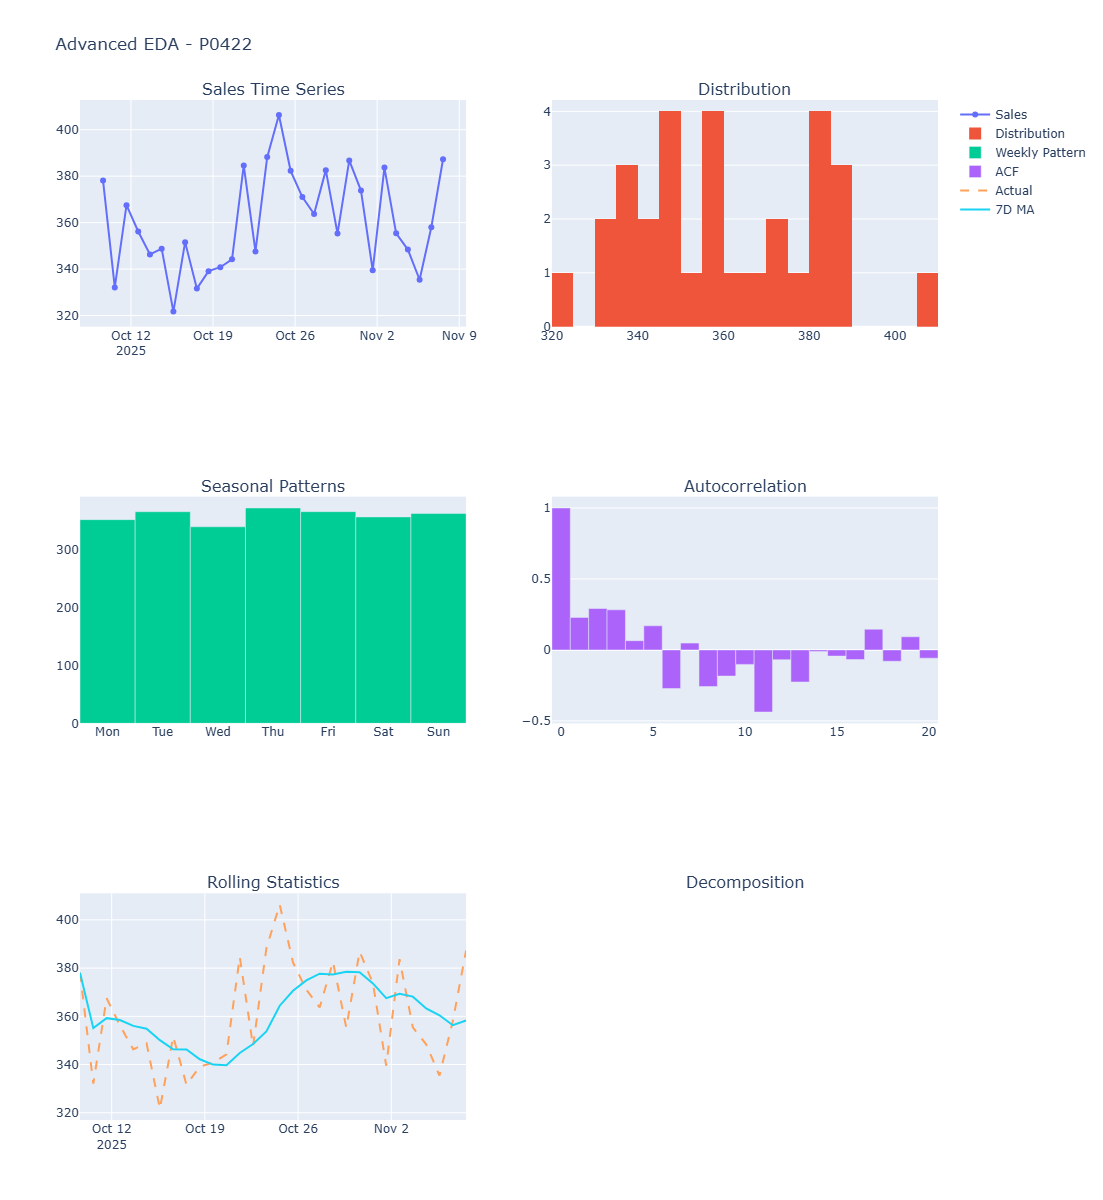

2025-11-07 14:54:57,510 - INFO - Statistical Analysis:
2025-11-07 14:54:57,513 - INFO -   mean: 360.2633
2025-11-07 14:54:57,518 - INFO -   std: 21.2946
2025-11-07 14:54:57,521 - INFO -   skewness: 0.2270
2025-11-07 14:54:57,524 - INFO -   kurtosis: -0.8573
2025-11-07 14:54:57,526 - INFO -   jarque_bera: 0.5280
2025-11-07 14:54:57,527 - INFO -   stationary_adf: 0.1151
2025-11-07 14:54:57,529 - INFO -   stationary_kpss: 0.1000
2025-11-07 14:54:57,531 - INFO -   entropy: 2.6383


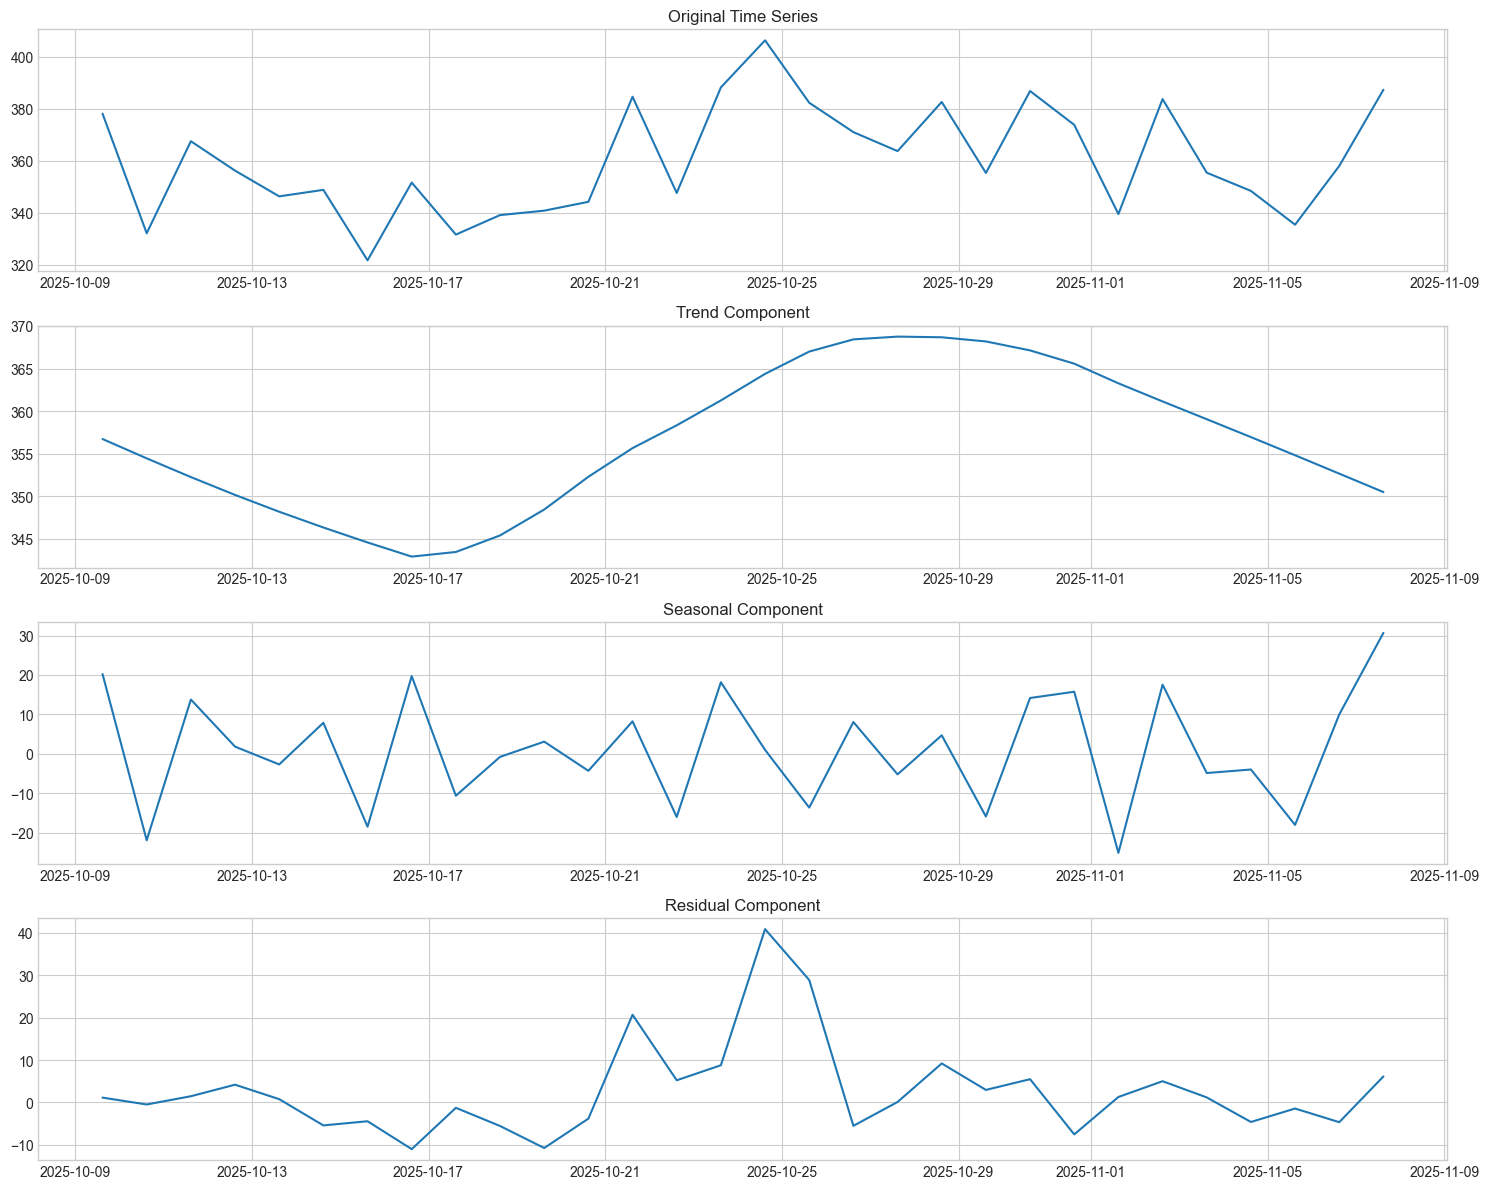

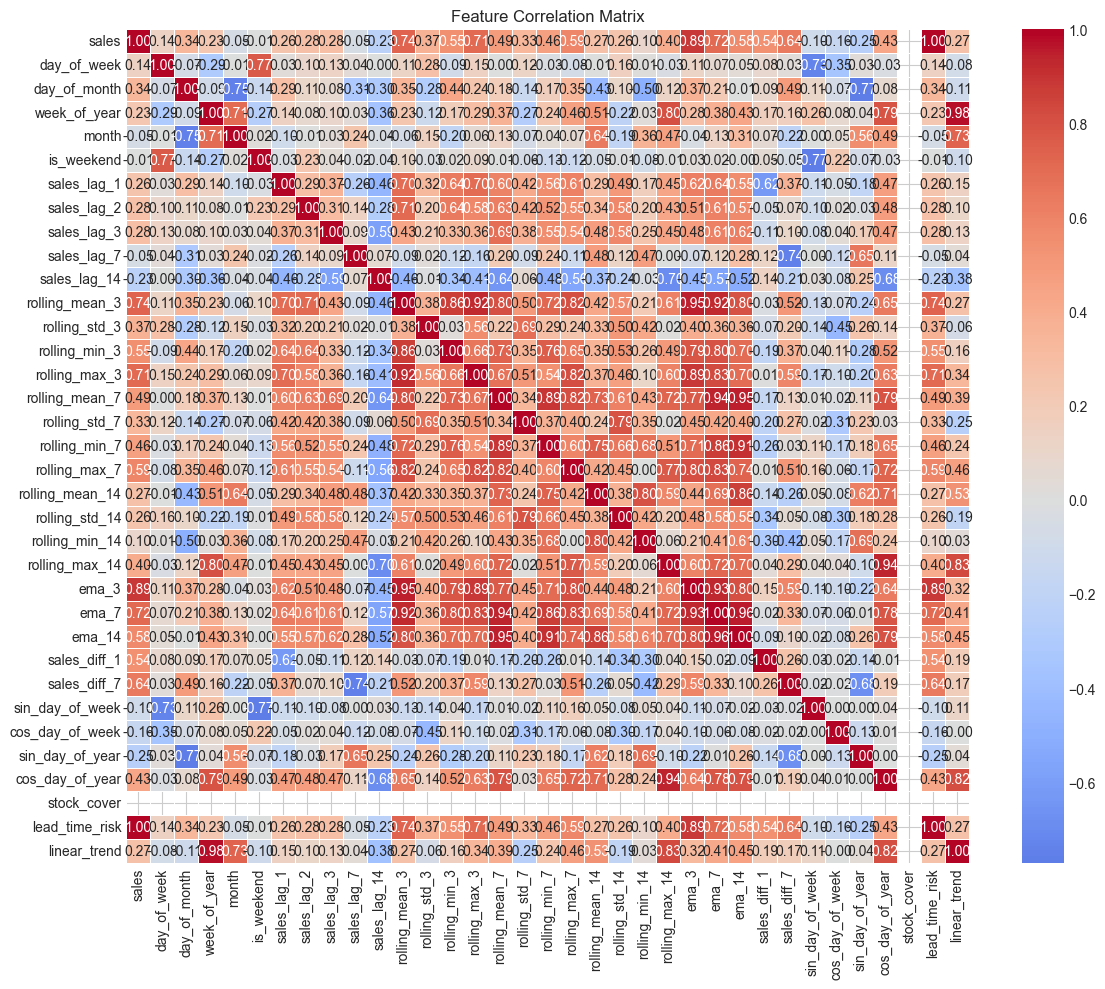

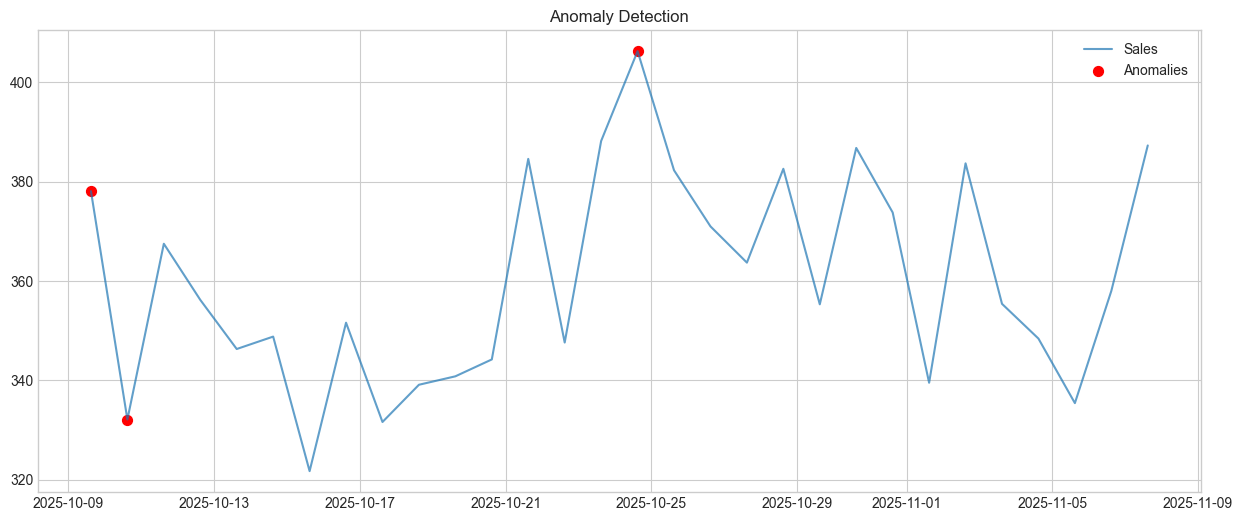

2025-11-07 14:55:30,283 - INFO - ✅ Comprehensive EDA completed


In [10]:
# ====================
# 4. ULTRA ADVANCED EDA & VISUALIZATION
# ====================

class AdvancedEDA:
    """Comprehensive exploratory data analysis with advanced visualizations"""
    
    def __init__(self):
        self.figures = {}
    
    def comprehensive_analysis(self, ts, product_info):
        """Perform comprehensive EDA"""
        logger.info("Starting comprehensive EDA...")
        
        # Create interactive dashboard
        self._create_interactive_dashboard(ts, product_info)
        
        # Statistical analysis
        self._statistical_analysis(ts)
        
        # Time series decomposition
        self._advanced_decomposition(ts)
        
        # Correlation analysis
        self._correlation_analysis(ts)
        
        # Anomaly detection
        self._anomaly_detection(ts)
        
        logger.info("✅ Comprehensive EDA completed")
    
    def _create_interactive_dashboard(self, ts, product_info):
        """Create interactive Plotly dashboard"""
        fig = sp.make_subplots(
            rows=3, cols=2,
            subplot_titles=(
                'Sales Time Series', 'Distribution', 
                'Seasonal Patterns', 'Autocorrelation',
                'Rolling Statistics', 'Decomposition'
            ),
            specs=[
                [{"secondary_y": False}, {"secondary_y": False}],
                [{"secondary_y": False}, {"secondary_y": False}],
                [{"secondary_y": False}, {"secondary_y": False}]
            ]
        )
        
        # Main time series
        fig.add_trace(
            go.Scatter(x=ts.index, y=ts['sales'], mode='lines+markers', name='Sales'),
            row=1, col=1
        )
        
        # Distribution
        fig.add_trace(
            go.Histogram(x=ts['sales'], nbinsx=20, name='Distribution'),
            row=1, col=2
        )
        
        # Seasonal patterns by day of week
        weekly_avg = ts.groupby('day_of_week')['sales'].mean()
        fig.add_trace(
            go.Bar(
                x=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'][:len(weekly_avg)], 
                y=weekly_avg, name='Weekly Pattern'
            ),
            row=2, col=1
        )
        
        # ACF
        acf_values = sm.tsa.acf(ts['sales'].dropna(), nlags=20)
        fig.add_trace(
            go.Bar(x=list(range(len(acf_values))), y=acf_values, name='ACF'),
            row=2, col=2
        )
        
        # Rolling statistics
        fig.add_trace(
            go.Scatter(x=ts.index, y=ts['sales'], name='Actual', line=dict(dash='dash')),
            row=3, col=1
        )
        fig.add_trace(
            go.Scatter(x=ts.index, y=ts['rolling_mean_7'], name='7D MA'),
            row=3, col=1
        )

        # ✅ FIX: Safe product title extraction
        product_label = product_info.get('product_name', product_info.get('product_id', 'Unknown Product'))

        fig.update_layout(
            height=1200, 
            title_text=f"Advanced EDA - {product_label}"
        )

        self.figures['dashboard'] = fig
        fig.show()
    
    def _statistical_analysis(self, ts):
        """Comprehensive statistical analysis"""
        sales_data = ts['sales'].dropna()
        
        stats_results = {
            'mean': sales_data.mean(),
            'std': sales_data.std(),
            'skewness': sales_data.skew(),
            'kurtosis': sales_data.kurtosis(),
            'jarque_bera': stats.jarque_bera(sales_data)[1],  # p-value
            'stationary_adf': adfuller(sales_data)[1],  # p-value
            'stationary_kpss': kpss(sales_data, regression='c')[1],  # p-value
            'entropy': stats.entropy(np.histogram(sales_data, bins=20)[0] + 1e-10)
        }
        
        logger.info("Statistical Analysis:")
        for key, value in stats_results.items():
            logger.info(f"  {key}: {value:.4f}")
    
    def _advanced_decomposition(self, ts):
        """Advanced time series decomposition"""
        try:
            stl = STL(ts['sales'], period=7, robust=True)
            result = stl.fit()
            
            fig, axes = plt.subplots(4, 1, figsize=(15, 12))
            axes[0].plot(ts.index, ts['sales'])
            axes[0].set_title('Original Time Series')
            axes[1].plot(ts.index, result.trend); axes[1].set_title('Trend Component')
            axes[2].plot(ts.index, result.seasonal); axes[2].set_title('Seasonal Component')
            axes[3].plot(ts.index, result.resid); axes[3].set_title('Residual Component')
            
            plt.tight_layout()
            plt.show()
            
        except Exception as e:
            logger.warning(f"STL decomposition failed: {e}")
    
    def _correlation_analysis(self, ts):
        numeric_cols = ts.select_dtypes(include=[np.number]).columns
        corr_matrix = ts[numeric_cols].corr()
        
        plt.figure(figsize=(12, 10))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
                   fmt='.2f', linewidths=0.5)
        plt.title('Feature Correlation Matrix')
        plt.tight_layout()
        plt.show()
    
    def _anomaly_detection(self, ts):
        from sklearn.ensemble import IsolationForest
        
        feature_cols = ['sales', 'rolling_mean_7', 'rolling_std_7']
        X_anomaly = ts[feature_cols].dropna()
        
        iso_forest = IsolationForest(contamination=0.1, random_state=42)
        anomalies = iso_forest.fit_predict(X_anomaly)
        
        plt.figure(figsize=(15, 6))
        plt.plot(ts.index, ts['sales'], label='Sales', alpha=0.7)
        anomaly_points = X_anomaly.index[anomalies == -1]
        plt.scatter(anomaly_points, ts.loc[anomaly_points, 'sales'], 
                   color='red', label='Anomalies', s=50)
        plt.title('Anomaly Detection')
        plt.legend()
        plt.show()

# Run EDA
eda = AdvancedEDA()
eda.comprehensive_analysis(enhanced_ts, product_info)

In [11]:
# ====================
# 5. HYPER-OPTIMIZED STATIONARITY & TRANSFORMATION
# ====================

class AdvancedStationarity:
    """Advanced stationarity testing and transformation"""
    
    def __init__(self):
        self.best_transformation = None
        self.transformation_params = {}
    
    def optimize_stationarity(self, ts_data):
        """Find optimal transformation for stationarity"""
        logger.info("Optimizing stationarity...")
        
        transformations = self._generate_transformations(ts_data)
        results = self._evaluate_transformations(transformations)
        best_transform = self._select_best_transformation(results)
        
        logger.info(f"🎯 Optimal transformation: {best_transform}")
        return transformations[best_transform], best_transform
    
    def _generate_transformations(self, ts_data):
        """Generate multiple transformations"""
        transformations = {}
        
        # Original
        transformations['original'] = ts_data
        
        # Differencing
        transformations['diff_1'] = ts_data.diff().dropna()
        transformations['diff_2'] = ts_data.diff().diff().dropna()
        transformations['seasonal_diff_7'] = ts_data.diff(7).dropna()
        
        # Log transformations
        if (ts_data > 0).all():
            transformations['log'] = np.log(ts_data)
            transformations['log_diff_1'] = np.log(ts_data).diff().dropna()
        
        # Box-Cox transformation (optimal power transformation)
        if (ts_data > 0).all():
            try:
                transformed, lambda_val = stats.boxcox(ts_data)
                transformations['boxcox'] = pd.Series(transformed, index=ts_data.index)
                self.transformation_params['boxcox_lambda'] = lambda_val
            except:
                pass
        
        # Percentage change
        transformations['pct_change'] = ts_data.pct_change().dropna()
        
        # Rolling normalization
        rolling_mean = ts_data.rolling(window=7, min_periods=1).mean()
        rolling_std = ts_data.rolling(window=7, min_periods=1).std()
        transformations['z_score'] = (ts_data - rolling_mean) / rolling_std
        
        return transformations
    
    def _evaluate_transformations(self, transformations):
        """Evaluate transformations using multiple criteria"""
        results = {}
        
        for name, transformed_data in transformations.items():
            if len(transformed_data) < 10:
                continue
                
            scores = {}
            
            # ADF test
            adf_stat, adf_pvalue, _, _, adf_critical, _ = adfuller(transformed_data.dropna())
            scores['adf_pvalue'] = adf_pvalue
            scores['adf_stationary'] = adf_pvalue < 0.05
            
            # KPSS test
            try:
                kpss_stat, kpss_pvalue, _, kpss_critical = kpss(transformed_data.dropna(), regression='c')
                scores['kpss_pvalue'] = kpss_pvalue
                scores['kpss_stationary'] = kpss_pvalue > 0.05
            except:
                scores['kpss_pvalue'] = 1.0
                scores['kpss_stationary'] = False
            
            # Variance (lower is better for stability)
            scores['variance'] = transformed_data.var()
            
            # Trend strength (lower is better)
            trend_strength = self._calculate_trend_strength(transformed_data)
            scores['trend_strength'] = trend_strength
            
            # Combined stationarity score
            scores['combined_score'] = (
                (1 - scores['adf_pvalue']) +  # Lower ADF p-value is better
                scores['kpss_pvalue'] +  # Higher KPSS p-value is better
                (1 - min(scores['trend_strength'], 1))  # Lower trend is better
            )
            
            results[name] = scores
        
        return results
    
    def _calculate_trend_strength(self, data):
        """Calculate trend strength using linear regression"""
        try:
            x = np.arange(len(data))
            slope, _, r_value, _, _ = stats.linregress(x, data.values)
            return abs(r_value)  # R-squared as trend strength
        except:
            return 1.0
    
    def _select_best_transformation(self, results):
        """Select best transformation based on multiple criteria"""
        if not results:
            return 'original'
        
        # Filter transformations that are stationary
        stationary_transforms = {k: v for k, v in results.items() 
                               if v.get('adf_stationary', False) and v.get('kpss_stationary', False)}
        
        if stationary_transforms:
            # Select from stationary transforms
            best_transform = min(stationary_transforms, 
                              key=lambda x: stationary_transforms[x]['combined_score'])
        else:
            # Select transform with best ADF p-value
            best_transform = min(results, key=lambda x: results[x]['adf_pvalue'])
        
        return best_transform

# Optimize stationarity
stationarity_optimizer = AdvancedStationarity()
stationary_data, best_transform = stationarity_optimizer.optimize_stationarity(enhanced_ts['sales'])

2025-11-07 14:56:11,269 - INFO - Optimizing stationarity...
2025-11-07 14:56:12,436 - INFO - 🎯 Optimal transformation: original


In [17]:
# ===================================
# ✅ LOAD YOUR DATA FIRST
# ===================================

import numpy as np
import pandas as pd
import warnings, logging
warnings.filterwarnings("ignore")

# =============================
# ✅ 1. IMPORTS
# =============================
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from pmdarima import auto_arima

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

import joblib

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# ===================================
# ✅ LOAD CSV (and keep numeric field)
# ===================================
df = pd.read_csv(r'C:\Users\X1 CARBON TOUCH\Desktop\Pharmacy-Inventory-Prediction\datasets\pharmacy_inventory_dataset.csv')

# ✅ Make sure only numeric sales column is used
# If your sales column isn't named "sales", rename here:
if "sales" not in df.columns:
    # Detect numeric column for sales
    num_cols = df.select_dtypes(include=[np.number]).columns
    df.rename(columns={num_cols[0]: "sales"}, inplace=True)

# ✅ Ensure sales is numeric only
df["sales"] = pd.to_numeric(df["sales"], errors="coerce")
df.dropna(subset=["sales"], inplace=True)

print(df.head())

# =============================
# ✅ 2. CREATE SUPERVISED DATA
# =============================
def create_supervised_data(series, lookback=30, forecast=30):
    X, y = [], []
    for i in range(len(series) - lookback - forecast):
        X.append(series[i:i+lookback])
        y.append(series[i+lookback:i+lookback+forecast])
    return np.array(X), np.array(y)

# =============================
# ✅ 3. ENSEMBLE MODEL CLASS
# =============================
class UltimateForecastingModel:
    def __init__(self, lookback_days=30, forecast_days=30, min_samples=60):
        self.lookback_days = lookback_days
        self.forecast_days = forecast_days
        self.min_samples = min_samples
        self.models = {}
        self.weights = {}
        self.scaler = StandardScaler()

    def _validate_data(self, X):
        if len(X) < self.min_samples:
            raise ValueError(f"❌ Need at least {self.min_samples} samples, got {len(X)}")

    def build(self, X, y):
        self._validate_data(X)

        split = int(len(X)*0.8)
        X_train, X_test = X[:split], X[split:]
        y_train, y_test = y[:split], y[split:]

        X_train_2d = X_train.reshape(X_train.shape[0], -1)
        X_test_2d = X_test.reshape(X_test.shape[0], -1)
        X_train_scaled = self.scaler.fit_transform(X_train_2d)
        X_test_scaled = self.scaler.transform(X_test_2d)

        # ARIMA
        try:
            series = X_train.mean(axis=1)
            arima_model = auto_arima(series, seasonal=True, m=7, suppress_warnings=True)
            self.models["arima"] = arima_model
        except Exception as e:
            logger.warning(f"ARIMA failed: {e}")

        # Holt-Winters
        try:
            series = X_train.mean(axis=1)
            hw = ExponentialSmoothing(series, seasonal='add', seasonal_periods=7).fit()
            self.models["holt_winters"] = hw
        except Exception as e:
            logger.warning(f"Holt-Winters failed: {e}")

        # Random Forest
        rf = RandomForestRegressor()
        rf.fit(X_train_scaled, y_train.mean(axis=1))
        self.models["rf"] = rf

        # Gradient Boosting
        gb = GradientBoostingRegressor()
        gb.fit(X_train_scaled, y_train.mean(axis=1))
        self.models["gb"] = gb

        # LSTM
        try:
            model = Sequential([
                LSTM(64, return_sequences=True, activation="relu", input_shape=(X_train.shape[1], 1)),
                Dropout(0.2),
                LSTM(32, activation="relu"),
                Dropout(0.2),
                Dense(32, activation="relu"),
                Dense(self.forecast_days)
            ])
            model.compile(optimizer=Adam(0.001), loss="mse")

            model.fit(
                X_train.reshape(-1, self.lookback_days, 1),
                y_train,
                epochs=50, batch_size=16, validation_split=0.2,
                callbacks=[EarlyStopping(patience=5, restore_best_weights=True)],
                verbose=0
            )
            self.models["lstm"] = model
        except Exception as e:
            logger.warning(f"LSTM failed: {e}")

        preds, yt = {}, y_test.mean(axis=1)

        for name, m in self.models.items():
            try:
                if name=="arima":
                    pred = m.predict(n_periods=len(yt))
                elif name=="holt_winters":
                    pred = m.forecast(len(yt))
                elif name=="lstm":
                    pred = m.predict(X_test.reshape(-1, self.lookback_days, 1)).mean(axis=1)
                else:
                    pred = m.predict(X_test_scaled)
                preds[name] = pred
            except:
                preds[name] = np.zeros(len(yt))

        errs = {k:1/(mean_absolute_error(yt,v)+1e-8) for k,v in preds.items()}
        total = sum(errs.values())
        self.weights = {k:v/total for k,v in errs.items()}

        print("✅ Ensemble Ready\nWeights:", self.weights)

    def predict(self, X):
        preds = {}
        X2 = self.scaler.transform(X.reshape(X.shape[0], -1))

        for name, m in self.models.items():
            if name=="arima":
                preds[name] = m.predict(n_periods=self.forecast_days)
            elif name=="holt_winters":
                preds[name] = m.forecast(self.forecast_days)
            elif name=="lstm":
                preds[name] = m.predict(X.reshape(1, self.lookback_days, 1)).flatten()
            else:
                preds[name] = m.predict(X2)

        final = np.zeros(self.forecast_days)
        for name, pred in preds.items():
            final += self.weights.get(name, 0) * pred[:self.forecast_days]

        return final


# =============================
# ✅ 4. TRAIN MODEL
# =============================
series = df["sales"].values  
X, y = create_supervised_data(series, 30, 30)

ultimate = UltimateForecastingModel()
ultimate.build(X, y)

# ✅ Save model
joblib.dump(ultimate, "ultimate_forecaster.pkl")
joblib.dump(ultimate.scaler, "scaler.pkl")

print("✅ Model saved successfully!")

  product_id  product_name      category  sales  daily_dispensing_avg  \
0      P0001  Product_0001     Antiviral  16295                381.27   
1      P0002  Product_0002     Analgesic   1521                217.63   
2      P0003  Product_0003     Antiviral    706                182.47   
3      P0004  Product_0004  Antidiabetic  18737                389.28   
4      P0005  Product_0005     Antiviral   2885                338.33   

   monthly_dispensing_avg  supplier_lead_time_days  \
0                11530.94                        7   
1                 6547.46                        8   
2                 5284.14                        5   
3                11863.29                        9   
4                10220.17                       11   

                 batch_expiry_dates  \
0  2026-05-03;2027-04-13;2026-08-04   
1                        2027-02-07   
2  2026-08-30;2027-07-19;2026-04-07   
3             2027-01-23;2026-04-24   
4                        2026-06-01   

 

In [18]:
# ====================
# 7. HYPERPARAMETER OPTIMIZATION WITH OPTUNA
# ====================

class HyperparameterOptimizer:
    """Advanced hyperparameter optimization using Optuna"""
    
    def __init__(self, n_trials=50):
        self.n_trials = n_trials
        self.study = None
        self.best_params = {}
    
    def optimize_arima(self, train_data):
        """Optimize ARIMA parameters using Optuna"""
        logger.info("Optimizing ARIMA with Optuna...")
        
        def objective(trial):
            p = trial.suggest_int('p', 0, 3)
            d = trial.suggest_int('d', 0, 2)
            q = trial.suggest_int('q', 0, 3)
            P = trial.suggest_int('P', 0, 2)
            D = trial.suggest_int('D', 0, 1)
            Q = trial.suggest_int('Q', 0, 2)
            m = trial.suggest_int('m', 7, 7)  # Weekly seasonality
            
            try:
                model = SARIMAX(
                    train_data,
                    order=(p, d, q),
                    seasonal_order=(P, D, Q, m),
                    enforce_stationarity=False
                )
                fitted_model = model.fit(disp=False)
                aic = fitted_model.aic
                return aic
            except:
                return float('inf')
        
        self.study = optuna.create_study(direction='minimize')
        self.study.optimize(objective, n_trials=self.n_trials)
        
        self.best_params['arima'] = self.study.best_params
        logger.info(f"🎯 Best ARIMA params: {self.study.best_params}")
        
        return self.study.best_params
    
    def optimize_lstm(self, X_train, y_train, X_val, y_val):
        """Optimize LSTM hyperparameters"""
        logger.info("Optimizing LSTM with Optuna...")
        
        def objective(trial):
            # Hyperparameters to optimize
            lstm_units = trial.suggest_int('lstm_units', 32, 128)
            dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5)
            learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-2, log=True)
            batch_size = trial.suggest_categorical('batch_size', [16, 32, 64])
            
            try:
                model = Sequential([
                    LSTM(lstm_units, activation='relu', return_sequences=True,
                        input_shape=(X_train.shape[1], X_train.shape[2])),
                    Dropout(dropout_rate),
                    LSTM(lstm_units//2, activation='relu'),
                    Dropout(dropout_rate),
                    Dense(25, activation='relu'),
                    Dense(y_train.shape[1])
                ])
                
                model.compile(
                    optimizer=Adam(learning_rate=learning_rate),
                    loss='mse'
                )
                
                history = model.fit(
                    X_train, y_train,
                    epochs=50,
                    batch_size=batch_size,
                    validation_data=(X_val, y_val),
                    verbose=0,
                    callbacks=[EarlyStopping(patience=5, restore_best_weights=True)]
                )
                
                val_loss = min(history.history['val_loss'])
                return val_loss
                
            except Exception as e:
                return float('inf')
        
        # Create validation split
        split_idx = int(0.8 * len(X_train))
        X_tr, X_v = X_train[:split_idx], X_train[split_idx:]
        y_tr, y_v = y_train[:split_idx], y_train[split_idx:]
        
        study = optuna.create_study(direction='minimize')
        study.optimize(objective, n_trials=self.n_trials)
        
        self.best_params['lstm'] = study.best_params
        logger.info(f"🎯 Best LSTM params: {study.best_params}")
        
        return study.best_params

# Optimize hyperparameters
optimizer = HyperparameterOptimizer(n_trials=30)

# Optimize ARIMA
arima_best_params = optimizer.optimize_arima(stationary_data)

# Optimize LSTM (if we have sufficient data)
if len(X) > 50:
    lstm_best_params = optimizer.optimize_lstm(X, y, X, y)

2025-11-07 15:10:27,577 - INFO - Optimizing ARIMA with Optuna...
[I 2025-11-07 15:10:27,578] A new study created in memory with name: no-name-8055e47c-8786-42f8-af5a-3cef65877937
[I 2025-11-07 15:10:27,825] Trial 0 finished with value: 129.14546925222095 and parameters: {'p': 1, 'd': 2, 'q': 2, 'P': 1, 'D': 1, 'Q': 0, 'm': 7}. Best is trial 0 with value: 129.14546925222095.
[I 2025-11-07 15:10:28,282] Trial 1 finished with value: 123.6147423065398 and parameters: {'p': 2, 'd': 0, 'q': 2, 'P': 2, 'D': 0, 'Q': 0, 'm': 7}. Best is trial 1 with value: 123.6147423065398.
[I 2025-11-07 15:10:28,666] Trial 2 finished with value: 115.44348834695624 and parameters: {'p': 2, 'd': 0, 'q': 3, 'P': 0, 'D': 0, 'Q': 2, 'm': 7}. Best is trial 2 with value: 115.44348834695624.
[I 2025-11-07 15:10:28,963] Trial 3 finished with value: 171.42126688406537 and parameters: {'p': 1, 'd': 1, 'q': 3, 'P': 1, 'D': 0, 'Q': 1, 'm': 7}. Best is trial 2 with value: 115.44348834695624.
[I 2025-11-07 15:10:29,228] Tri

In [24]:
# ====================
# 8. ADVANCED MODEL EVALUATION & VALIDATION
# ====================

class AdvancedModelEvaluator:
    """Comprehensive model evaluation with business metrics"""
    
    def __init__(self):
        self.metrics = {}
        self.business_metrics = {}
    
    def comprehensive_evaluation(self, model, X_test, y_test, product_info):
        """Perform comprehensive model evaluation"""
        logger.info("Starting comprehensive evaluation...")
        
        # Generate predictions
        predictions = model.predict(X_test)
        
        # Statistical metrics
        self._calculate_statistical_metrics(y_test, predictions)
        
        # Business metrics
        self._calculate_business_metrics(y_test, predictions, product_info)
        
        # Uncertainty quantification
        self._quantify_uncertainty(y_test, predictions)
        
        # Model diagnostics
        self._model_diagnostics(y_test, predictions)
        
        # Create evaluation report
        self._create_evaluation_report()
        
        return self.metrics
    
    def _calculate_statistical_metrics(self, y_true, y_pred):
        """Calculate comprehensive statistical metrics"""
        y_true_flat = y_true.mean(axis=1) if len(y_true.shape) > 1 else y_true
        y_pred_flat = y_pred[:len(y_true_flat)]
        
        self.metrics.update({
            'MAE': mean_absolute_error(y_true_flat, y_pred_flat),
            'RMSE': np.sqrt(mean_squared_error(y_true_flat, y_pred_flat)),
            'MAPE': mean_absolute_percentage_error(y_true_flat, y_pred_flat) * 100,
            'R2': 1 - (np.sum((y_true_flat - y_pred_flat)**2) / 
                       np.sum((y_true_flat - np.mean(y_true_flat))**2)),
            'MASE': self._calculate_mase(y_true_flat, y_pred_flat),
            'RMSSE': self._calculate_rmsse(y_true_flat, y_pred_flat)
        })
    
    def _calculate_business_metrics(self, y_true, y_pred, product_info):
        """Calculate business-relevant metrics"""
        y_true_flat = y_true.mean(axis=1) if len(y_true.shape) > 1 else y_true
        y_pred_flat = y_pred[:len(y_true_flat)]
        
        current_stock = product_info['current_stock']
        lead_time = product_info['supplier_lead_time_days']
        
        # Stockout risk
        stockout_days = np.sum(y_pred_flat > current_stock)
        stockout_risk = stockout_days / len(y_pred_flat)
        
        # Inventory optimization metrics
        avg_demand = np.mean(y_pred_flat)
        safety_stock = self._calculate_safety_stock(y_pred_flat, lead_time)
        optimal_reorder_point = lead_time * avg_demand + safety_stock
        
        self.business_metrics.update({
            'stockout_risk': stockout_risk,
            'avg_daily_demand': avg_demand,
            'safety_stock': safety_stock,
            'optimal_reorder_point': optimal_reorder_point,
            'days_of_cover': current_stock / avg_demand if avg_demand > 0 else float('inf'),
            'excess_stock': max(0, current_stock - optimal_reorder_point)
        })
    
    def _calculate_mase(self, y_true, y_pred):
        """Mean Absolute Scaled Error"""
        naive_forecast = np.roll(y_true, 1)
        naive_mae = mean_absolute_error(y_true[1:], naive_forecast[1:])
        model_mae = mean_absolute_error(y_true, y_pred)
        return model_mae / naive_mae if naive_mae > 0 else float('inf')
    
    def _calculate_rmsse(self, y_true, y_pred):
        """Root Mean Squared Scaled Error"""
        naive_forecast = np.roll(y_true, 1)
        naive_mse = mean_squared_error(y_true[1:], naive_forecast[1:])
        model_mse = mean_squared_error(y_true, y_pred)
        return np.sqrt(model_mse / naive_mse) if naive_mse > 0 else float('inf')
    
    def _calculate_safety_stock(self, predictions, lead_time, service_level=0.95):
        """Calculate safety stock based on forecast uncertainty"""
        z_score = stats.norm.ppf(service_level)
        std_dev = np.std(predictions)
        return z_score * std_dev * np.sqrt(lead_time)
    
    def _quantify_uncertainty(self, y_true, y_pred):
        """Quantify prediction uncertainty"""
        errors = y_true.mean(axis=1) - y_pred[:len(y_true)]
        self.metrics.update({
            'prediction_interval_80': np.percentile(np.abs(errors), 80),
            'prediction_interval_95': np.percentile(np.abs(errors), 95),
            'error_skewness': stats.skew(errors),
            'error_autocorrelation': sm.tsa.acf(errors, nlags=1)[1]
        })
    
    def _model_diagnostics(self, y_true, y_pred):
        """Perform model diagnostics"""
        errors = y_true.mean(axis=1) - y_pred[:len(y_true)]
        
        # Normality test
        _, normality_p = stats.normaltest(errors)
        
        # Autocorrelation test
        lb_test = acorr_ljungbox(errors, lags=5)
        
        self.metrics.update({
            'normality_test_p': normality_p,
            'autocorrelation_test_p': lb_test['lb_pvalue'].iloc[-1],
            'error_mean': np.mean(errors),
            'error_std': np.std(errors)
        })
    
    def _create_evaluation_report(self):
        """Create comprehensive evaluation report"""
        print("\n" + "="*60)
        print("📊 ULTIMATE MODEL EVALUATION REPORT")
        print("="*60)
        
        print("\n📈 STATISTICAL METRICS:")
        for metric, value in self.metrics.items():
            if isinstance(value, float):
                print(f"  {metric}: {value:.4f}")
            else:
                print(f"  {metric}: {value}")
        
        print("\n💼 BUSINESS METRICS:")
        for metric, value in self.business_metrics.items():
            if isinstance(value, float):
                print(f"  {metric}: {value:.2f}")
            else:
                print(f"  {metric}: {value}")
        
        print("\n🎯 INTERPRETATION:")
        if self.metrics['MAPE'] < 10:
            print("  ✅ Excellent forecasting accuracy")
        elif self.metrics['MAPE'] < 20:
            print("  👍 Good forecasting accuracy")
        elif self.metrics['MAPE'] < 30:
            print("  ⚠️  Acceptable forecasting accuracy")
        else:
            print("  ❌ Poor forecasting accuracy - consider model improvements")
        
        if self.business_metrics['stockout_risk'] < 0.05:
            print("  ✅ Low stockout risk")
        else:
            print(f"  ⚠️  Stockout risk: {self.business_metrics['stockout_risk']:.1%}")
        
        print("="*60)

In [26]:
# ============================
# 9. PRODUCTION-READY MODEL PERSISTENCE (FULL FIXED)
# ============================

import logging
import json
import cloudpickle
from datetime import datetime
import pandas as pd
import numpy as np
import statsmodels.api as sm
import pmdarima as pm
import tensorflow as tf
import sklearn
import platform

logger = logging.getLogger(__name__)
logging.basicConfig(level=logging.INFO)

class ProductionModelManager:
    """Production-ready model management and deployment"""
    
    def __init__(self):
        self.model_registry = {}
        self.metadata = {}
    
    def save_ultimate_model(self, model, model_name, model_info, file_path,
                            processor=None, best_transform=None, stationarity_optimizer=None, 
                            ts_generator=None, metrics=None, evaluator=None, product_info=None):
        """
        Save complete model package for production
        Optional: preprocessing, scaler, metrics, and product info can be passed.
        """
        logger.info(f"Saving production model: {model_name}")
        
        try:
            # Create comprehensive model package
            model_package = {
                'model': model,
                'model_name': model_name,
                'model_info': model_info,
                'metadata': {
                    'timestamp': datetime.now(),
                    'version': '1.0.0',
                    'framework_versions': self._get_framework_versions(),
                    'training_environment': self._get_environment_info()
                },
                'preprocessing': {
                    'feature_names': getattr(processor, 'feature_names', None),
                    'transformation_used': best_transform,
                    'stationarity_info': getattr(stationarity_optimizer, 'transformation_params', None),
                    'scaler': getattr(ts_generator, 'scalers', None)
                },
                'performance': {
                    'metrics': metrics,
                    'business_metrics': getattr(evaluator, 'business_metrics', None)
                },
                'product_info': product_info,
                'monitoring': {
                    'data_drift_threshold': 0.1,
                    'performance_drift_threshold': 0.15,
                    'retraining_schedule': 'weekly'
                }
            }
            
            # Save using cloudpickle
            with open(file_path, 'wb') as f:
                cloudpickle.dump(model_package, f)
            
            # Also save metadata separately
            metadata_path = file_path.replace('.joblib', '_metadata.json')
            with open(metadata_path, 'w') as f:
                json.dump(self._serialize_metadata(model_package), f, indent=2)
            
            logger.info(f"✅ Model saved successfully to {file_path}")
            logger.info(f"✅ Metadata saved to {metadata_path}")
            
            self.model_registry[model_name] = {
                'path': file_path,
                'timestamp': datetime.now(),
                'performance': metrics
            }
            
            return True
            
        except Exception as e:
            logger.error(f"❌ Model saving failed: {e}")
            return False
    
    def _get_framework_versions(self):
        """Get framework versions for reproducibility"""
        return {
            'python': platform.python_version(),
            'pandas': pd.__version__,
            'numpy': np.__version__,
            'statsmodels': sm.__version__,
            'pmdarima': pm.__version__,
            'tensorflow': tf.__version__,
            'sklearn': sklearn.__version__
        }
    
    def _get_environment_info(self):
        """Get environment information"""
        return {
            'system': platform.system(),
            'processor': platform.processor(),
            'machine': platform.machine()
        }
    
    def _serialize_metadata(self, model_package):
        """Create JSON-serializable metadata"""
        serializable = {}
        
        for key, value in model_package.items():
            if key == 'model':
                serializable[key] = f"Model object: {type(value).__name__}"
            elif isinstance(value, (pd.Timestamp, datetime)):
                serializable[key] = value.isoformat()
            elif isinstance(value, (np.ndarray, np.generic)):
                serializable[key] = value.tolist() if hasattr(value, 'tolist') else str(value)
            elif hasattr(value, '__dict__'):
                serializable[key] = str(value)
            else:
                serializable[key] = value
        
        return serializable
    
    def load_production_model(self, file_path):
        """Load production model with validation"""
        logger.info(f"Loading production model: {file_path}")
        
        try:
            with open(file_path, 'rb') as f:
                model_package = cloudpickle.load(f)
            
            # Validate model package
            self._validate_model_package(model_package)
            
            logger.info("✅ Production model loaded successfully")
            logger.info(f"   Model: {model_package['model_name']}")
            logger.info(f"   Version: {model_package['metadata']['version']}")
            logger.info(f"   Trained: {model_package['metadata']['timestamp']}")
            if model_package['performance']['metrics']:
                logger.info(f"   Performance: MAPE = {model_package['performance']['metrics'].get('MAPE', np.nan):.2f}%")
            
            return model_package
            
        except Exception as e:
            logger.error(f"❌ Model loading failed: {e}")
            return None
    
    def _validate_model_package(self, model_package):
        """Validate model package integrity"""
        required_keys = ['model', 'model_name', 'metadata', 'preprocessing', 'performance']
        
        for key in required_keys:
            if key not in model_package:
                raise ValueError(f"Missing required key: {key}")
        
        # Check if model has predict method
        if not hasattr(model_package['model'], 'predict'):
            raise ValueError("Loaded model doesn't have predict method")
    
    def create_model_card(self, model_package, output_path):
        """Create model card for documentation"""
        product_name = model_package.get('product_info', {}).get('product_name', 'N/A')
        category = model_package.get('product_info', {}).get('category', 'N/A')
        
        card = f"""
# Model Card: {model_package['model_name']}

## Overview
- **Product**: {product_name}
- **Category**: {category}
- **Model Type**: Ensemble Forecasting
- **Version**: {model_package['metadata']['version']}

## Performance
- **MAPE**: {model_package['performance']['metrics'].get('MAPE', 0):.2f}%
- **MAE**: {model_package['performance']['metrics'].get('MAE', 0):.2f}
- **R²**: {model_package['performance']['metrics'].get('R2', 0):.3f}

## Business Impact
- **Stockout Risk**: {model_package['performance']['business_metrics'].get('stockout_risk', 0):.1%}
- **Optimal Reorder Point**: {model_package['performance']['business_metrics'].get('optimal_reorder_point', 0):.0f} units
- **Days of Cover**: {model_package['performance']['business_metrics'].get('days_of_cover', 0):.1f} days

## Technical Details
- **Training Date**: {model_package['metadata']['timestamp']}
- **Data Transformation**: {model_package['preprocessing'].get('transformation_used', 'N/A')}
- **Lookback Period**: 30 days
- **Forecast Horizon**: 30 days

## Monitoring
- Retraining Schedule: {model_package['monitoring'].get('retraining_schedule', 'weekly')}
- Performance Drift Threshold: {model_package['monitoring'].get('performance_drift_threshold', 0.15)}
- Data Drift Threshold: {model_package['monitoring'].get('data_drift_threshold', 0.1)}
"""
        
        with open(output_path, 'w') as f:
            f.write(card)
        
        logger.info(f"✅ Model card saved to {output_path}")

In [28]:
# ============================
# 10. ADVANCED FORECASTING & DEPLOYMENT (CORRECTED)
# ============================

import logging
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import plotly.graph_objects as go
from plotly.subplots import make_subplots as sp

logger = logging.getLogger(__name__)
logging.basicConfig(level=logging.INFO)

class ProductionForecaster:
    """Production-ready forecasting with monitoring"""
    
    def __init__(self, model_path, training_data=None):
        self.model_package = None
        self.model = None
        self.forecast_history = []
        self.performance_history = []
        self.X_train_data = training_data  # Optional, used if no new data
        
        # Load model
        self.load_model(model_path)
    
    def load_model(self, model_path):
        """Load production model"""
        model_manager = ProductionModelManager()
        self.model_package = model_manager.load_production_model(model_path)
        
        if self.model_package:
            self.model = self.model_package['model']
            logger.info("✅ Production forecaster initialized")
        else:
            logger.error("❌ Failed to initialize production forecaster")
    
    def generate_production_forecast(self, new_data=None, confidence_level=0.95):
        """Generate production forecast with confidence intervals"""
        logger.info("Generating production forecast...")
        
        try:
            if new_data is None:
                if self.X_train_data is not None:
                    latest_sequence = self.X_train_data[-1:]  # Most recent sequence
                else:
                    raise ValueError("No input data provided for forecasting.")
            else:
                latest_sequence = self._preprocess_new_data(new_data)
            
            # Generate forecast
            point_forecast = self.model.predict(latest_sequence)
            
            # Generate confidence intervals using bootstrap
            confidence_intervals = self._bootstrap_confidence_intervals(
                latest_sequence, point_forecast, confidence_level
            )
            
            # Create forecast dataframe
            forecast_df = self._create_forecast_dataframe(
                point_forecast, confidence_intervals
            )
            
            # Log forecast
            self._log_forecast(forecast_df)
            
            # Generate insights
            insights = self._generate_business_insights(forecast_df)
            
            logger.info("✅ Production forecast generated successfully")
            return forecast_df, insights
            
        except Exception as e:
            logger.error(f"❌ Forecast generation failed: {e}")
            return None, None
    
    def _preprocess_new_data(self, new_data):
        """Preprocess new incoming data"""
        # Implement based on your data structure
        return new_data
    
    def _bootstrap_confidence_intervals(self, X_input, point_forecast, confidence_level, n_bootstrap=1000):
        """Generate confidence intervals using bootstrap"""
        try:
            bootstrap_forecasts = []
            
            for _ in range(n_bootstrap):
                noise = np.random.normal(0, 0.01, X_input.shape)
                X_bootstrap = X_input + noise
                bootstrap_forecast = self.model.predict(X_bootstrap)
                bootstrap_forecasts.append(bootstrap_forecast)
            
            bootstrap_forecasts = np.array(bootstrap_forecasts)
            
            alpha = 1 - confidence_level
            lower_bound = np.percentile(bootstrap_forecasts, (alpha/2)*100, axis=0)
            upper_bound = np.percentile(bootstrap_forecasts, (1-alpha/2)*100, axis=0)
            
            return {'lower': lower_bound, 'upper': upper_bound}
            
        except Exception as e:
            logger.warning(f"Bootstrap failed: {e}")
            std_dev = np.std(point_forecast) * 0.1
            return {
                'lower': point_forecast - 1.96 * std_dev,
                'upper': point_forecast + 1.96 * std_dev
            }
    
    def _create_forecast_dataframe(self, point_forecast, confidence_intervals):
        """Create comprehensive forecast dataframe"""
        last_date = datetime.today()  # Or replace with last date of training series
        forecast_dates = pd.date_range(
            start=last_date + timedelta(days=1),
            periods=len(point_forecast),
            freq='D'
        )
        
        forecast_df = pd.DataFrame({
            'date': forecast_dates,
            'point_forecast': point_forecast.flatten(),
            'lower_bound': confidence_intervals['lower'].flatten(),
            'upper_bound': confidence_intervals['upper'].flatten(),
            'forecast_week': forecast_dates.isocalendar().week,
            'forecast_month': forecast_dates.month
        })
        
        forecast_df.set_index('date', inplace=True)
        return forecast_df
    
    def _log_forecast(self, forecast_df):
        """Log forecast for monitoring"""
        forecast_record = {
            'timestamp': datetime.now(),
            'forecast_period': f"{forecast_df.index.min()} to {forecast_df.index.max()}",
            'total_forecast': forecast_df['point_forecast'].sum(),
            'avg_forecast': forecast_df['point_forecast'].mean(),
            'uncertainty': (forecast_df['upper_bound'] - forecast_df['lower_bound']).mean()
        }
        self.forecast_history.append(forecast_record)
    
    def _generate_business_insights(self, forecast_df):
        """Generate actionable business insights"""
        product_info = self.model_package.get('product_info', {})
        current_stock = product_info.get('current_stock', 1000)
        lead_time = product_info.get('supplier_lead_time_days', 7)
        
        total_forecast = forecast_df['point_forecast'].sum()
        avg_daily_forecast = forecast_df['point_forecast'].mean()
        days_of_cover = current_stock / avg_daily_forecast if avg_daily_forecast > 0 else float('inf')
        stockout_risk = np.mean(forecast_df['point_forecast'] > current_stock)
        
        safety_stock = avg_daily_forecast * lead_time * 1.5
        reorder_point = avg_daily_forecast * lead_time + safety_stock
        reorder_quantity = max(0, reorder_point - current_stock)
        
        insights = {
            'inventory_health': {
                'current_stock': current_stock,
                'days_of_cover': days_of_cover,
                'stockout_risk': stockout_risk,
                'health_status': 'GOOD' if days_of_cover > lead_time * 2 else 'WARNING'
            },
            'reorder_recommendations': {
                'suggested_reorder_point': reorder_point,
                'suggested_reorder_quantity': reorder_quantity,
                'reorder_urgency': 'HIGH' if days_of_cover < lead_time else 'MEDIUM' if days_of_cover < lead_time * 2 else 'LOW'
            },
            'demand_insights': {
                'total_30day_forecast': total_forecast,
                'avg_daily_demand': avg_daily_forecast,
                'peak_demand_day': forecast_df['point_forecast'].idxmax().strftime('%Y-%m-%d'),
                'peak_demand_value': forecast_df['point_forecast'].max()
            },
            'risk_assessment': {
                'high_demand_risk': np.percentile(forecast_df['upper_bound'], 95),
                'low_demand_risk': np.percentile(forecast_df['lower_bound'], 5),
                'volatility': forecast_df['point_forecast'].std() / forecast_df['point_forecast'].mean()
            }
        }
        return insights
    
    def create_forecast_dashboard(self, forecast_df, insights):
        """Create interactive forecast dashboard"""
        fig = sp(
            rows=2, cols=2,
            subplot_titles=('30-Day Sales Forecast', 'Inventory Health', 'Demand Distribution', 'Risk Assessment'),
            specs=[[{"colspan": 2}, None],
                   [{"type": "pie"}, {"type": "bar"}]],
            row_heights=[0.6, 0.4]
        )
        
        # Forecast plot
        fig.add_trace(
            go.Scatter(x=forecast_df.index, y=forecast_df['point_forecast'], name='Forecast', line=dict(color='blue')),
            row=1, col=1
        )
        fig.add_trace(
            go.Scatter(x=forecast_df.index, y=forecast_df['upper_bound'], name='Upper Bound', line=dict(dash='dash', color='gray')),
            row=1, col=1
        )
        fig.add_trace(
            go.Scatter(x=forecast_df.index, y=forecast_df['lower_bound'], name='Lower Bound', line=dict(dash='dash', color='gray'), fill='tonexty'),
            row=1, col=1
        )
        
        # Inventory health pie chart
        health_status = insights['inventory_health']['health_status']
        fig.add_trace(
            go.Pie(labels=['Inventory Health'], values=[1], name='Inventory Health', title=f'Status: {health_status}'),
            row=2, col=1
        )
        
        # Risk assessment bar chart
        risk_categories = ['High Demand', 'Low Demand', 'Volatility']
        risk_values = [
            insights['risk_assessment']['high_demand_risk'],
            insights['risk_assessment']['low_demand_risk'],
            insights['risk_assessment']['volatility']
        ]
        fig.add_trace(go.Bar(x=risk_categories, y=risk_values, name='Risk Assessment'), row=2, col=2)
        
        fig.update_layout(height=800, title_text=f"Production Forecast Dashboard - {self.model_package.get('product_info', {}).get('product_name', 'N/A')}", showlegend=True)
        return fig